<a href="https://colab.research.google.com/github/Kathryn-Hise/Physics-Articles-ML/blob/main/1_Loop_of_KNN_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up

## Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import joblib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving metadata_and_tfidf_4.csv to metadata_and_tfidf_4.csv


In [ ]:
import io
#filename = 'only_tfidf.csv'
#filename = 'Metadata Reformatted & Validated - Sheet1 (1).csv'
#filename = 'merged_table_better.csv'
filename = 'metadata_and_tfidf_4.csv'
f = pd.read_csv(io.BytesIO(uploaded[filename]),encoding='unicode_escape')
#f = pd.read_csv(io.BytesIO(uploaded['']),encoding='unicode_escape')

# Dataset is now stored in a Pandas Dataframe

## Processing Array

In [ ]:
f = f.dropna()

In [ ]:
#turn into a numpy array
arr = f.to_numpy()
arr = np.delete(arr, 0, 0)
indexmark = len(arr[1])

In [ ]:
#change into feature categories
Y = arr[:,2]
Y = Y.astype(int)
#print(Y)
X = arr[:,-(indexmark - 3):]
X = X.astype(float)
#print(X)
#print(type(X[1][1]))

In [ ]:
#split the data into a 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
#print(type(X_train[1][4])) #check that its int

# Training with KNN

<Figure size 640x480 with 0 Axes>

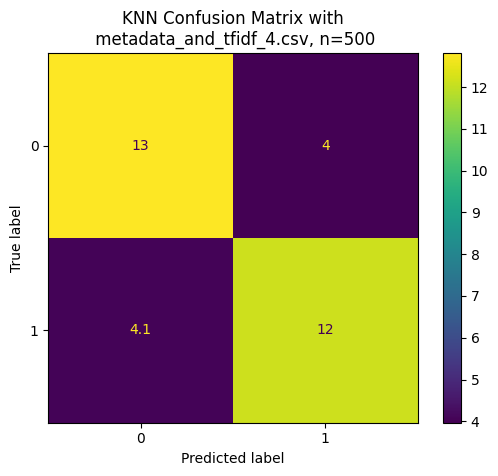

0.7565454545454546


In [ ]:
loopcount = 500
cnf_matrix = [[0,0],[0,0]]
cnf_sum = [[0,0],[0,0]]
for kjh in range(0,loopcount):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  max_acc = 0
  best_knn = 0
  for i in  range(1,len(X_train)):
      neigh = KNeighborsClassifier(n_neighbors=i)
      neigh.fit(X_train, Y_train)

      cnf_matrix = confusion_matrix(Y_test, neigh.predict(X_test))
      #print(cnf_matrix)
      #print(confusion_matrix(Y_test, neigh.predict(X_test),labels=["L", "B", "R"]))

      #print(sum(sum(cnf_matrix)))
      accuracy = 0
      for j in range(len(cnf_matrix)):
          accuracy += cnf_matrix[j][j]
      if accuracy > max_acc:
          max_acc = accuracy
          best_knn = i
      #show all the calculated KNN and accuracies below
      #print("Neighbors:", i," Accuracy:",accuracy/len(Y_test))

  #Use the best knn found
  #print("\nBest KNN Found:")
  #print("---------------")
  neigh = KNeighborsClassifier(n_neighbors=best_knn)
  neigh.fit(X_train, Y_train)
  #print(neigh.classes_)
  #print(confusion_matrix(Y_test, neigh.predict(X_test)))
  cnf_matrix =  confusion_matrix(Y_test, neigh.predict(X_test))
  cnf_sum = cnf_sum + cnf_matrix
  #print(cnf_sum)
  #print(cnf_matrix)
  #print(neigh.predict(X_test))

  #Prediction with probability
  #print(neigh.predict_proba(X_test))

  #Saving the model for future uses
  #from sklearn.externals import joblib
  joblib.dump(neigh, 'bestknn.pkl')

  #Re-use the model
  clf = joblib.load('bestknn.pkl')
  #print(clf.predict_proba(X_test))

  predictions = clf.predict(X_test)

cnf_sum = cnf_sum / loopcount
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_sum)
disp.plot()
plt.title(f"KNN Confusion Matrix with\n {filename}, n={loopcount}")
plt.show()

print((cnf_sum[0,0]+cnf_sum[1,1]) / (cnf_sum[0,0]+cnf_sum[1,0]+cnf_sum[0,1]+cnf_sum[1,1]) )